In [130]:
import re
import numpy as np
import scipy.spatial.distance as dst
import matplotlib.pyplot as plt

In [261]:
sentences_lower = []
with open('sentences.txt', 'r') as sentences:
    for line in sentences:
        sentences_lower.append(line.strip().lower())

In [262]:
sentences_splitted = []
for line in sentences_lower:
    sentences_splitted.append(filter(lambda x: x != '', re.split('[^a-z]', line)))

In [263]:
all_words = set([elem for words in sentences_splitted for elem in words])
m = {}
d = len(all_words)
for word, value in zip(all_words, xrange(d)):
    m[word] = value

In [264]:
n = len(sentences_splitted)
mat = np.zeros((n, d))
for i in range(n):
    for word in sentences_splitted[i]:
        mat[i][m[word]] += 1

In [266]:
dists = []
for i in range(1, n):
    dists.append(dst.cosine(mat[0], mat[i]))

In [273]:
a = zip(dists, range(1, n))
a.sort()

In [274]:
a[:5]

[(0.7327387580875756, 6),
 (0.7770887149698589, 4),
 (0.8250364469440588, 21),
 (0.8328165362273942, 10),
 (0.8396432548525454, 12)]

In [275]:
dst.cosine(mat[0], mat[6]), dst.cosine(mat[0], mat[4])

(0.7327387580875756, 0.7770887149698589)

In [276]:
!touch submission-1.txt
with open('submission-1.txt', 'w') as f:
    f.write("6 4")
!cat submission-1.txt

6 4

In [216]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

def p(x, w):
    value = 0;
    i = 0;
    for elem in w:
        value += elem * x**i
        i+=1
    return value

In [217]:
a, b = 1, 15

In [224]:
xx = np.array([1.0, 4.0, 10.0, 15.0])

In [225]:
A = np.zeros((4, 4))

for i in range(4):
    for j in range(4):
        A[i][j] = xx[i] ** j

c = f(xx)

In [226]:
w = np.linalg.solve(A, c)

In [227]:
res = []
zz = np.linspace(a, b, 40)
for x in xx:
    res.append(p(x, w))

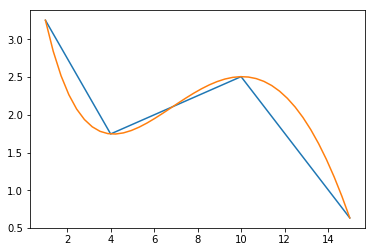

In [228]:
plt.figure()
plt.plot(xx, res)
plt.plot(zz, f(zz))

In [229]:
!touch submission-2.txt
with open('submission-2.txt', 'w') as f:
    f.write(" ".join(map(str, w)))
!cat submission-2.txt

4.362641535118072 -1.2955258656948436 0.1933368470215116 -0.008235651173320552